In [ ]:
from google.colab import files
upload = files.upload()

Saving Homework_2022.xlsx to Homework_2022.xlsx


In [ ]:
import pandas as pd 
import io

df = pd.read_excel(io.BytesIO(upload['Homework_2022.xlsx']))
df.head()

,idind,psu,status,age,male,industry,wage,public,internet,children,urban,educ
0,321,Кущевский р-,Село,41,1,НЕФТЕГАЗОВАЯ,25500,0,1,2,0,1
1,322,Кущевский р-,Село,51,1,СЕЛЬСКОЕ ХОЗ,12500,1,1,2,0,1
2,323,Кущевский р-,Село,26,0,"ТОРГОВЛЯ, БЫ",15500,0,1,0,0,2
3,324,Кущевский р-,Село,55,0,ОРГАНЫ УПРАВ,15500,1,1,2,0,2
4,325,Кущевский р-,Село,57,1,НЕФТЕГАЗОВАЯ,10500,1,0,2,0,1


# 1. Описание выборки

Генеральной совокупностью для моего варианта является находящееся в трудоспособном возрасте население Кущевского района Краснодарского края. 

Репрезентативная выборка - это такая выборка, в которой все основные признаки генеральной совокупности, из которой извлечена данная выборка, представлены приблизительно в той же пропорции или с той же частотой, с которой данный признак выступает в этой генеральной совокупности.

Данная выборка является репрезентативной, так как по каждому признаку и его значению присутствует достаточное количество наблюдений, то есть присутствуют люди всех возрастов, женщины и мужчины, представители всех отраслей и так далее в адекватной пропорции относительно генеральной совокупности.

# 2. Описательные статистики

In [ ]:
df2 = df[['age', 'male', 'wage', 'public', 'internet', 'children', 'urban', 'educ']]

In [ ]:
df2.mean() #средние значения по столбцам 

age            37.916667
male            0.500000
wage        19654.513889
public          0.479167
internet        0.875000
children        1.368056
urban           0.000000
educ            1.826389
dtype: float64

In [ ]:
df2.min() #минимальные значения по столбцам

age          19
male          0
wage        550
public        0
internet      0
children      0
urban         0
educ          0
dtype: int64

In [ ]:
df2.max() #максимальные значения по столбцам

age            59
male            1
wage        58500
public          1
internet        1
children        4
urban           0
educ            3
dtype: int64

In [ ]:
df2.std() #стандартное отклонение по столбцам

age            10.412137
male            0.501745
wage        10432.702942
public          0.501309
internet        0.331873
children        0.858903
urban           0.000000
educ            1.019597
dtype: float64

In [ ]:
df2.max() - df2.min() #размах

age            40
male            1
wage        57950
public          1
internet        1
children        4
urban           0
educ            3
dtype: int64

## 3. Квартили, размах

In [ ]:
import numpy as np

In [ ]:
q3, q2, q1 = np.percentile (df['age'], [75, 50, 25])
q3, q2, q1 #75, 50 и 25 квартили для возраста

(46.0, 36.0, 30.0)

In [ ]:
iqr = q3 - q1 #межквартильный размах для возраста
iqr

16.0

In [ ]:
q3, q2, q1 = np.percentile (df['wage'], [75, 50, 25])
q3, q2, q1 #75, 50 и 25 квартили для зарплаты

(25500.0, 16500.0, 12500.0)

In [ ]:
iqr = q3 - q1 #межквартильный размах для зарплаты
iqr

13000.0

# 4. Average, median, mode

In [ ]:
np.average(df['wage']), np.average(df['age']) #среднее значение по зарплате и возрасту

(19654.51388888889, 37.916666666666664)

In [ ]:
np.median(df['wage']), np.median(df['age']) #медиана по зарплате и возрасту

(16500.0, 36.0)

In [ ]:
df['wage'].mode()[0], df['age'].mode()[0] #мода по зарплате и возрасту

(15500, 34)

Модальные и медианные значения по зарплате и возрасту соотносятся между собой, различия между ними незначительные. Однако они ниже средних значений, это значит что больше, чем у половины опрошенных, зарплата ниже среднего, и зарплата, встречающаяся в выборке чаще всего, тоже ниже среднего, интерпретация результатов по возрасту аналогична. По году и зарплате наблюдается правосторонняя асимметрия.

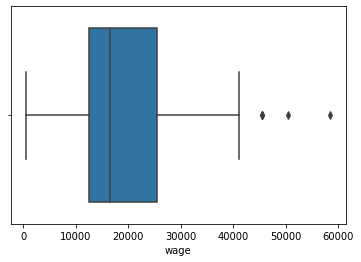

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.boxplot(x=df['wage']) #boxplot для размера зарплаты

На графике видим, что присутствует три выброса, чья величина зарплаты значительно больше, чем у подавляющего большинства человек.

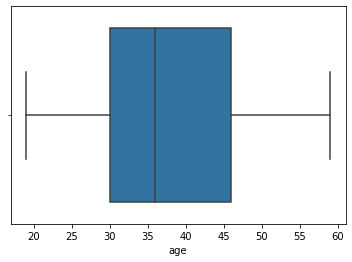

In [ ]:
sns.boxplot(x=df['age']) #boxplot для возраста 

На графике видим, что выбросов нет.

## 6. Гистограммы

In [ ]:
import scipy
from scipy.stats import skew
from scipy.stats import kurtosis

Скошенность: 1.1609213174314117 - распределение положительно скошено
Островершинность: 1.086500411653879 - распределение неостровершинное, так как значение меньше 3


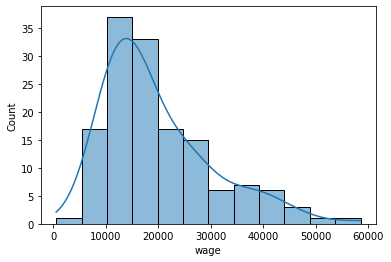

In [ ]:
from matplotlib.font_manager import OSXFontDirectories
sns.histplot(df['wage'], kde=True)
skos = skew(df['wage'])
ostro = kurtosis(df['wage'])
print(f'Скошенность: {skos} - распределение положительно скошено')
print(f'Островершинность: {ostro} - распределение неостровершинное, так как значение меньше 3')

Скошенность: 0.37490130193425275 - положительно скошено
Островершинность: -0.8377598950673031 - распределение плосковершинное


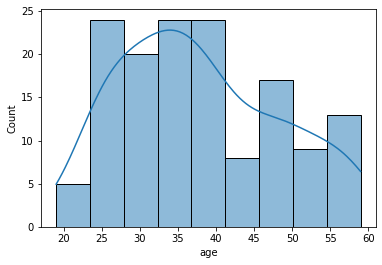

In [ ]:
sns.histplot(df['age'], kde=True)
skos = skew(df['age'])
ostro = kurtosis(df['age'])
print(f'Скошенность: {skos} - положительно скошено')
print(f'Островершинность: {ostro} - распределение плосковершинное')

## 7. Гистограмма распределения респондетов по уровню образования.

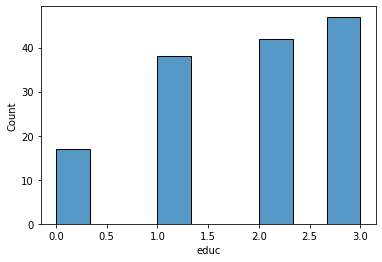

In [ ]:
sns.histplot(df['educ'])

По графику видим, что с ростом уровня образования растет число его обладателей.

## 8. Корреляционная таблица

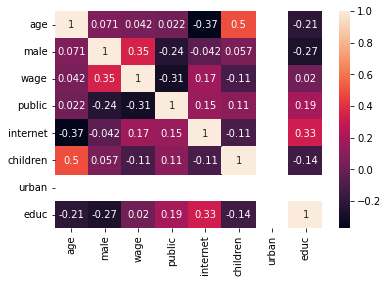

In [ ]:
corr = df2.corr()
sns.heatmap(corr,
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values, annot=True)

Выводы: Наибольшая положительная корреляция между возрастом и количеством детей (0,5) - чем выше возраст, тем больше детей у человека. Второе по величине положительное значение корреляции между полом и зарплатой - мужчины получают больше, чем женщины. Также те, у кого выше образование, чаще пользуются интернетом. Чем выше возраст, тем реже пользуются интернетом, в государственных предприятиях зарплата ниже, чем в частных. В гос.предприятиях работает больше женщин, чем мужчин. Образование выше у женщин, чем у мужчин.  

# 9. Зависимость зарплаты от переменных

Судя по корреляционной матрице зарплата в большей степени положительно зависит от пола (если мужчина, то выше), отрицательно зависит от типа предприятия (если государственное, то меньше), меньшая зависимость от пользования интернетом (тот, кто пользуется, получает больше) и от количества детей, однако логическая связь для данного признака нарушается, неочевидно, как количество детей влияет на зарплату в реальной жизни. Из предположений можно выделить самое очевидное: величина зарплаты зависит от отрасли, где работает человек.

male
0    15965.972222
1    23343.055556
Name: wage, dtype: float64

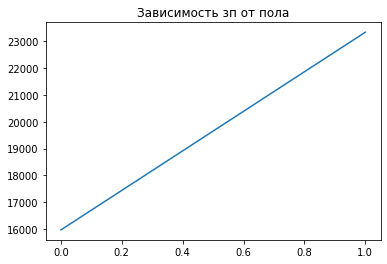

In [ ]:
zp = df.groupby('male')['wage'].mean() #зависимость от пола
plt.plot(zp)
plt.title('Зависимость зп от пола')
zp

Видна положительная зависимость

public
0    22733.333333
1    16307.971014
Name: wage, dtype: float64

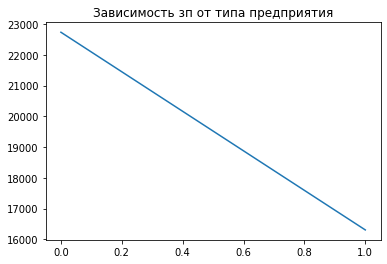

In [ ]:
zp = df.groupby('public')['wage'].mean() #зависимость от типа предприятия
plt.plot(zp)
plt.title('Зависимость зп от типа предприятия')
zp

В государственных предприятиях в среднем получают меньше, чем в частных.

educ
0    23205.882353
1    18073.684211
2    17484.523810
3    21587.234043
Name: wage, dtype: float64

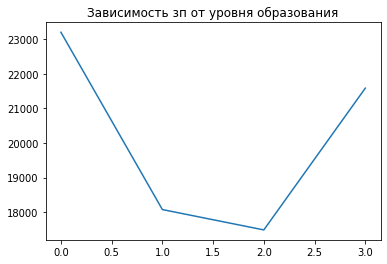

In [ ]:
zp = df.groupby('educ')['wage'].mean() #зависимость от уровня образования
plt.plot(zp)
plt.title('Зависимость зп от уровня образования')
zp

Казалось бы, между зп и уровнем образования должна быть положительная зависимость, однако на графике мы этого не видим.

internet
0    15072.222222
1    20309.126984
Name: wage, dtype: float64

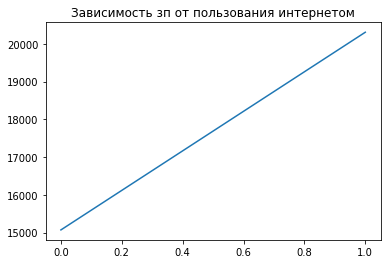

In [ ]:
zp = df.groupby('internet')['wage'].mean() #зависимость от пользования интернетом
plt.plot(zp)
plt.title('Зависимость зп от пользования интернетом')
zp

Видна положительная зависимость.

age
19    12500.000000
20    15000.000000
23    11000.000000
24    17285.714286
25    24900.000000
26    17250.000000
27    15625.000000
28    15166.666667
29    14525.000000
30    25500.000000
31    17250.000000
32    20500.000000
33    29833.333333
34    20355.555556
35    26166.666667
36    13283.333333
37    27833.333333
38    14928.571429
39    21666.666667
40    34250.000000
41    16200.000000
42    15500.000000
43     7500.000000
44    29000.000000
45    10500.000000
46    19700.000000
47    17280.000000
48    28000.000000
49    22166.666667
50    12933.333333
51    19500.000000
52    15833.333333
53    10000.000000
54    11250.000000
55    16500.000000
56    31500.000000
57    16750.000000
58    13166.666667
59    42500.000000
Name: wage, dtype: float64

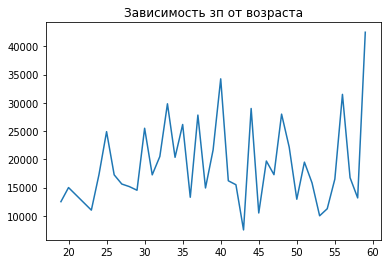

In [ ]:
zp = df.groupby('age')['wage'].mean() #зависимость от возраста
plt.plot(zp)
plt.title('Зависимость зп от возраста')
zp

Ожидалось, что люди среднего возраста получают больше, чем молодешь и люди близкие к пенсионному возрасту. Однако, по графику видно, что явной зависимости нет.

## 10. Линейная модель

In [ ]:
df['high'] = np.where(df['educ']==3, 1, 0)

In [ ]:
import statsmodels.api as sm # стандартные регрессионные модели
import statsmodels.formula.api as smf # аналогичные модели с синтаксисом в стиле R
import statsmodels.graphics.gofplots as gf # визуализация моделей
import statsmodels.discrete.discrete_model # дискретные модели
from statsmodels.stats.outliers_influence import summary_table # работа с выбросами
from scipy.stats import shapiro # тест Шапиро – Уилка

In [ ]:
ols_1 = smf.ols('wage ~ age + high + male + urban + children', data=df).fit()
print(ols_1.summary())

                            OLS Regression Results                            
Dep. Variable:                   wage   R-squared:                       0.186
Model:                            OLS   Adj. R-squared:                  0.162
Method:                 Least Squares   F-statistic:                     7.930
Date:                Tue, 25 Oct 2022   Prob (F-statistic):           8.70e-06
Time:                        14:34:21   Log-Likelihood:                -1521.4
No. Observations:                 144   AIC:                             3053.
Df Residuals:                     139   BIC:                             3068.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    1.24e+04   3251.833      3.813      0.0

/usr/local/lib/python3.7/dist-packages/statsmodels/regression/linear_model.py:1860: RuntimeWarning: divide by zero encountered in double_scalars
  return np.sqrt(eigvals[0]/eigvals[-1])


In [ ]:
ols_2 = smf.ols('wage ~ age + high + male + children', data=df).fit()
print(ols_2.summary())

                            OLS Regression Results                            
Dep. Variable:                   wage   R-squared:                       0.186
Model:                            OLS   Adj. R-squared:                  0.162
Method:                 Least Squares   F-statistic:                     7.930
Date:                Tue, 25 Oct 2022   Prob (F-statistic):           8.70e-06
Time:                        14:34:22   Log-Likelihood:                -1521.4
No. Observations:                 144   AIC:                             3053.
Df Residuals:                     139   BIC:                             3068.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    1.24e+04   3251.833      3.813      0.0

**Вывод:** Исходя из столбца  P>|t|, показывающего p-value гипотезы о незначимости коэффициента, видим, что все коэффициенты оказались значимыми (так как p-value очень маленький), кроме коэффициента при переменной 'urban' и 'age' (т.к. p-value для age можно считать достаточно немалым). В моей выборке только сельские жители, поэтому переменная urban в моей выборке у всех равна 0, следовательно коэффициент оценить для нее не получится. И что очевидно, убрав переменную из модели, получили ровно такую же модель.

**Уравнение оцененной модели:** $\widehat{Wage} = 12400 + 125.2 * Age + 4154.2 * High + 8030.8 * Male - 2091.26 * Children$

Модель показывает положительную зависимость зп от возраста, которая неочевидна на графике, также положительную зависимость от наличия высшего образования, что не соответствует ситуации на графике, так как новая переменная High упрощает переменную Education, тем самым модель предлагает менее оптимальный коэффициент. Коэффициент при Male логичен, исходя из данных, мужчины зарабатывают больше женщин, модель оценивает это различие на 8030 рублей. Также единственный отрицательный коэффициент при Children показывает, что при рождении каждого следующего ребенка зп снижается на 2091.

## 11. Проверка адекватности модели

По выведенной таблице результатов оценки модели можем определить адекватна ли модель или нет, для этого находим строчку F-statistic = 7.930 или Prob (F-statistic) = 8.70e-06. В качестве нулевой гипотезы при подсчете этой F-статистики используется гипотеза о несостоятельности модели, то есть равенство всех коэффициентов нулю. Если F-statistic имеет большое значение или Prob (F-statistic) (т.е. p-value) имеет маленькое значение, то альтернативная гипотеза о состоятельности модели не отвергается, и можно сделать вывод о том, что модель адекватна. F-statistic = 7.930 достаточно большое значение и Prob (F-statistic) = 8.70e-06 достаточно малое значение, чтобы заявить о том, что модель адекватна.

# 12. Гипотеза для одного из коэффициентов

Проверим гипотезу о равенстве коэффициента при регрессоре high 0 в модели ols_1

$H_0: W_{high} = 0 \\
H_1: W_{high} \neq 0$ 

In [ ]:
# Проверим гипотезу о равенстве коэффициента при регрессоре high 0 в модели ols_1
hypotheses = '(high = 0)' # формулируем гипотезу H_0
print(ols_1.f_test(r_matrix = hypotheses)) # тестируем гипотезу с помощью F-теста

<F test: F=array([[5.71772217]]), p=0.018133550608523997, df_denom=139, df_num=1>


Гипотеза о равенстве нулю коэффициента при регрессоре high не принимается на уровне значимости от 0,02 и выше. Следовательно, альтернативная гипотеза о значимости коэффициента при регрессоре high не отвергается в общем случае.

# 13. Гипотеза для нескольких коэффициентов

Проверим гипотезу о равенстве коэффициента при регрессоре male двум коэффициентам при регрессоре high в модели ols_1

$H_0: 2W_{high} - W_{male} = 0 \\
H_1: 2W_{high} - W_{male} \neq 0$ 

In [ ]:
hypotheses = '(2*high-male= 0)' # формулируем гипотезу H_0
print(ols_1.f_test(r_matrix = hypotheses)) # тестируем гипотезу с помощью F-теста

<F test: F=array([[0.00594843]]), p=0.9386341776877525, df_denom=139, df_num=1>


Гипотеза о равенстве коэффициента при регрессоре male двум коэффициентам при регрессоре high не отвергается из-за большого значения p-value.

## 14. График остатки-прогнозы

In [ ]:
df['yhat'] = ols_2.fittedvalues #прогнозы модели

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, 'Residuals')

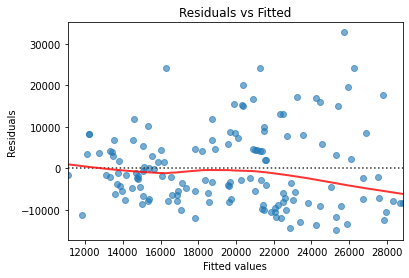

In [ ]:
fig_1 = plt.figure(1)
fig_1.axes[0] = sns.residplot(df['yhat'], df['wage'],
                                  lowess=True,
                                  scatter_kws={'alpha': 0.6},
                                  line_kws={'color': 'red', 'lw': 2, 'alpha': 0.8})
fig_1.axes[0].set_title('Residuals vs Fitted')
fig_1.axes[0].set_xlabel('Fitted values')
fig_1.axes[0].set_ylabel('Residuals')

Хоть и видень тренд вниз, по факту значения имеют большой разброс в этой области и не отражают какую-либо зависимость. Следовательно, остатки не коррелируют с yhat, следовательно мы учли все факторы модели.

# 15. Новая модель только со значимыми коэффициентами 

In [ ]:
ols_3 = smf.ols('wage ~ high + male + children', data=df).fit()
print(ols_3.summary())

                            OLS Regression Results                            
Dep. Variable:                   wage   R-squared:                       0.174
Model:                            OLS   Adj. R-squared:                  0.156
Method:                 Least Squares   F-statistic:                     9.838
Date:                Tue, 25 Oct 2022   Prob (F-statistic):           6.25e-06
Time:                        14:35:15   Log-Likelihood:                -1522.4
No. Observations:                 144   AIC:                             3053.
Df Residuals:                     140   BIC:                             3065.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.616e+04   1874.559      8.619      0.0

Модели можно сравнить по информационным критериям AIC и BIC: чем они меньше, те модель лучше. Новая модель лучше первой, так как у новой модели F-statistic больше, BIC меньше, AIC одинаковый. Однако данная модель уступает по качеству первой модели, так как $R^2$ снизился, то есть доля объясняемой моделью дисперсии снизилась.

**Уравнение модели:** $\widehat{Wage} = 16160 + 3966.4 * High + 8114.8 * Male - 1355.46 * Children$

Однако p-value для 'children' в данной модели равен 0.152, что указывает на возможную незначимость признака. Сделаем еще одну модель, удалив признак 'children'.

In [ ]:
ols_4 = smf.ols('wage ~ high + male', data=df).fit()
print(ols_4.summary())

                            OLS Regression Results                            
Dep. Variable:                   wage   R-squared:                       0.162
Model:                            OLS   Adj. R-squared:                  0.150
Method:                 Least Squares   F-statistic:                     13.62
Date:                Tue, 25 Oct 2022   Prob (F-statistic):           3.92e-06
Time:                        14:35:47   Log-Likelihood:                -1523.5
No. Observations:                 144   AIC:                             3053.
Df Residuals:                     141   BIC:                             3062.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.425e+04   1331.144     10.704      0.0

Третья модель лучше второй и первой, так как у новой модели F-statistic больше, BIC меньше, AIC одинаковый. Однако проигрывает им по метрике $R^2$. Все оставшиеся коэффициенты значимы.

**Уравнение модели:** $\widehat{Wage} = 14250 + 4263.9 * High + 8028.5 * Male$

# 16. Прогноз для 28 летней женщины с высшим образованием, у которой один ребенок, проживает в селе.

In [ ]:
individ = pd.DataFrame([{'age': 28, 'high': 1, 'male': 0, 'urban': 0, 'children': 1}])

wage = ols_1.predict(individ)
print(f'Предсказанная заработная плата: {wage[0].round(0)} рублей')

Предсказанная заработная плата: 17966.0 рублей


In [ ]:
# Построим предиктивные интервалы для прогнозов
prediction = ols_2.get_prediction(individ)

# Построим 90%-й предиктивный интервал
print(f'90%-й предиктивный интервал: {prediction.conf_int(alpha=0.1)} - с вероятностью 90 процентов реальная зарплата данного человека находится в этом интервале')

90%-й предиктивный интервал: [[15257.50517352 20674.16315425]] - с вероятностью 90 процентов реальная зарплата данного человека находится в этом интервале
